In [1]:
#Yug Gupta

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('my_data/train.csv')
df = df[:50000]
df

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
49995,2,Amazingly nice for the price! Works great!,I didn't expect much. It's cheap. What I got i...
49996,1,Save your money,Not accurate at all. You can measure the same ...
49997,2,great buy...,"good price, fast shipping! what more could you..."
49998,2,Works well for my application...,This product works well for my specific applic...


In [3]:
df.columns = ['Sentiment score', 'Title', 'Description']

In [4]:
# 1 =negative
# 2 = positive
df['Sentiment score'].value_counts()

Sentiment score
2    25506
1    24494
Name: count, dtype: int64

In [5]:
df.isna().sum()

Sentiment score    0
Title              5
Description        0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['Title'][125]

"Oh where Oh where have my Oh's gone?"

In [7]:
df.isna().sum()

Sentiment score    0
Title              0
Description        0
dtype: int64

# Text preprocessing

In [8]:
# lowercase
df['Title'] = df['Title'].str.lower()
df['Description'] = df['Description'].str.lower()

df[:10]

,Sentiment score,Title,Description
0,2,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...
1,2,amazing!,this soundtrack is my favorite music of all ti...
2,2,excellent soundtrack,i truly like this soundtrack and i enjoy video...
3,2,"remember, pull your jaw off the floor after he...","if you've played the game, you know how divine..."
4,2,an absolute masterpiece,i am quite sure any of you actually taking the...
5,1,buyer beware,"this is a self-published book, and if you want..."
6,2,glorious story,i loved whisper of the wicked saints. the stor...
7,2,a five star book,i just finished reading whisper of the wicked ...
8,2,whispers of the wicked saints,this was a easy to read book that made me want...
9,1,the worst!,a complete waste of time. typographical errors...


In [9]:
#Removing punctuations
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
x = "what's your anme? "
x.translate(str.maketrans('','',exclude))

'whats your anme '

In [11]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

remove_punc("Huraah!!!!")

'Huraah'

In [12]:
df['Title'] = df['Title'].apply(remove_punc)
df['Description'] = df['Description'].apply(remove_punc)

In [13]:
df['Title'][125] #punc removed

'oh where oh where have my ohs gone'

In [14]:
#spell check
! pip install -U textblob
! python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [15]:
from textblob import TextBlob

In [16]:
blobby = TextBlob('what are oyu doign?')
blobby.correct().string

'what are you doing?'

In [17]:
def spell_check(text):
    return TextBlob(text).correct().string

In [18]:
#Bohot time lagega so omitting
# df['Title']= df['Title'].apply(spell_check)
# df['Description']= df['Description'].apply(spell_check)

In [19]:
!pip install nltk

In [20]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\yugtg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal

True

In [21]:
from nltk.corpus import stopwords

In [22]:
stopwordss= stopwords.words('english')
stopwordss

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
text = 'beaches are best'
new_text = []
for word in text.split():
    if word.lower() not in stopwordss:
        new_text.append(word)
        
' '.join(new_text)
        
        

'beaches best'

In [24]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word.lower() not in stopwordss:
            new_text.append(word)
    return ' '.join(new_text)     

In [25]:
df['Title'] = df['Title'].apply(remove_stopwords)
df['Description'] = df['Description'].apply(remove_stopwords)

In [26]:
# Tokenisation by spacy library 
!pip install spacy

In [27]:
!python -m spacy download en_core_web_sm 

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 219.4 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 219.4 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 502.3 kB/s eta 0:00:26
      -------------------------------------- 0.3/12.8 MB 896.4 kB/s eta 0:00:14
     -- ------------------------------------- 0.7/12.8 MB 1.7 MB/s eta 0:00:08
     --- ------------------------------------ 1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.8 MB 3.0 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 3.4 MB/s eta 0:00:04
     ------ --------------------------------- 2.1/12.8 MB 3.7 MB/s eta 0:00:

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm') #engish ki ek dictionary choti 

In [29]:
doc1 = nlp('hello yugtgupta@gmail.com')
doc1

hello yugtgupta@gmail.com

In [30]:
for word in doc1:
    print(word)

hello
yugtgupta@gmail.com


In [31]:
#Using nltk
from nltk.tokenize import word_tokenize,sent_tokenize

print(sent_tokenize('The weather is good. the icecream is cold'))
print(word_tokenize("what is the deal yugtgupta@gmail.com"))

['The weather is good.', 'the icecream is cold']
['what', 'is', 'the', 'deal', 'yugtgupta', '@', 'gmail.com']


In [32]:
#Lemmitization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [33]:
wnl.lemmatize('talking',pos = 'v')

'talk'

In [34]:
def lemmatize_words(sentence):
    transformed_text = []
    for word in word_tokenize(sentence):
        w = wnl.lemmatize(word.lower(),pos='v')
        transformed_text.append(w)
    return ' '.join(transformed_text)
    

In [35]:
lemmatize_words('Talking talked and talks')

'talk talk and talk'

In [36]:
df['Title'] = df['Title'].apply(lemmatize_words)
df['Description'] = df['Description'].apply(lemmatize_words)

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(stop_words='english')
bow1 = cv1.fit_transform(df['Title'])
bow1

<49995x17293 sparse matrix of type '<class 'numpy.int64'>'
	with 127502 stored elements in Compressed Sparse Row format>

In [39]:
#Bag of words, bigram

cv2 = CountVectorizer(stop_words='english',ngram_range=(2,2))

In [40]:
bow2= cv2.fit_transform(df['Title'])
bow2

<49995x57463 sparse matrix of type '<class 'numpy.int64'>'
	with 79297 stored elements in Compressed Sparse Row format>

In [41]:
len((cv2.vocabulary_)), cv2.vocabulary_

(57463,
 {'best soundtrack': 5160,
  'excellent soundtrack': 17216,
  'remember pull': 42538,
  'pull jaw': 40498,
  'jaw floor': 27402,
  'floor hear': 19364,
  'absolute masterpiece': 801,
  'buyer beware': 8237,
  'glorious story': 20921,
  'star book': 47603,
  'whisper wicked': 55153,
  'wicked saint': 55220,
  'great book': 22198,
  'great read': 22764,
  'awful belief': 3370,
  'dont try': 14779,
  'try fool': 52040,
  'fool fake': 19504,
  'fake review': 17906,
  'romantic zen': 43607,
  'zen baseball': 57399,
  'baseball comedy': 4138,
  'fashionable compression': 18354,
  'compression stock': 11147,
  'jobst ultrasheer': 27574,
  'ultrasheer thigh': 52428,
  'thigh high': 50374,
  'size recomended': 46065,
  'recomended size': 42119,
  'size chart': 46030,
  'chart real': 9285,
  'mens ultrasheer': 32735,
  'delicious cookie': 13215,
  'cookie mix': 11562,
  'abysmal digital': 897,
  'digital copy': 13917,
  'fascinate insight': 18319,
  'insight life': 26596,
  'life modern'

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf.fit_transform(df['Title'])

<49995x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 112827 stored elements in Compressed Sparse Row format>

In [43]:
tfidf.fit_transform(df['Title']).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
len(tfidf.vocabulary_), tfidf.vocabulary_

(5000,
 {'best': 469,
  'soundtrack': 4107,
  'amaze': 223,
  'excellent': 1593,
  'remember': 3618,
  'pull': 3469,
  'jaw': 2413,
  'floor': 1760,
  'hear': 2076,
  'absolute': 99,
  'masterpiece': 2754,
  'buyer': 669,
  'beware': 477,
  'story': 4235,
  'star': 4185,
  'book': 555,
  'whisper': 4859,
  'wicked': 4866,
  'saint': 3777,
  'worst': 4928,
  'great': 1978,
  'read': 3543,
  'oh': 3072,
  'awful': 366,
  'belief': 449,
  'dont': 1346,
  'try': 4567,
  'fool': 1782,
  'fake': 1660,
  'review': 3673,
  'romantic': 3733,
  'zen': 4990,
  'baseball': 409,
  'comedy': 931,
  'compression': 962,
  'stock': 4226,
  'high': 2118,
  'size': 4002,
  'recomended': 3572,
  'chart': 790,
  'real': 3548,
  'mens': 2801,
  'delicious': 1199,
  'cookie': 1015,
  'mix': 2864,
  'abysmal': 107,
  'digital': 1261,
  'copy': 1021,
  'fascinate': 1679,
  'insight': 2322,
  'life': 2602,
  'modern': 2872,
  'japanese': 2409,
  'teens': 4396,
  'like': 2609,
  'album': 196,
  'think': 4440,
  

In [45]:
tfidf.idf_

array([ 7.52923884,  8.20878037, 10.21026037, ...,  9.25474892,
       10.72108599, 10.72108599])

In [46]:
tfidf.get_feature_names_out()


array(['10', '100', '1000', ..., 'zumo', 'zzzzz', 'zzzzzzz'], dtype=object)

In [47]:
df.head()

,Sentiment score,Title,Description
0,2,best soundtrack ever anything,im read lot review say best game soundtrack fi...
1,2,amaze,soundtrack favorite music time hand intense sa...
2,2,excellent soundtrack,truly like soundtrack enjoy video game music p...
3,2,remember pull jaw floor hear,youve play game know divine music every single...
4,2,absolute masterpiece,quite sure actually take time read play game l...


In [48]:
df.isna().sum()

Sentiment score    0
Title              0
Description        0
dtype: int64

## Applying tfidf and making a combined review column now

In [49]:
df['Combined Review'] = df['Title'] + " " + df['Description']
df.head()

,Sentiment score,Title,Description,Combined Review
0,2,best soundtrack ever anything,im read lot review say best game soundtrack fi...,best soundtrack ever anything im read lot revi...
1,2,amaze,soundtrack favorite music time hand intense sa...,amaze soundtrack favorite music time hand inte...
2,2,excellent soundtrack,truly like soundtrack enjoy video game music p...,excellent soundtrack truly like soundtrack enj...
3,2,remember pull jaw floor hear,youve play game know divine music every single...,remember pull jaw floor hear youve play game k...
4,2,absolute masterpiece,quite sure actually take time read play game l...,absolute masterpiece quite sure actually take ...


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['Combined Review'])

In [51]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [52]:
tfidf_df

,10,100,1000,101,10th,11,12,120,13,14,...,yrs,yuck,zen,zero,zombie,zombies,zone,zoo,zoom,zoot
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49991,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49992,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49993,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
tfidf_df['Sentiment score'] = df['Sentiment score']

In [61]:
df.isna().sum()

Sentiment score    0
Title              0
Description        0
Combined Review    0
dtype: int64

In [62]:
df

,Sentiment score,Title,Description,Combined Review
0,2,best soundtrack ever anything,im read lot review say best game soundtrack fi...,best soundtrack ever anything im read lot revi...
1,2,amaze,soundtrack favorite music time hand intense sa...,amaze soundtrack favorite music time hand inte...
2,2,excellent soundtrack,truly like soundtrack enjoy video game music p...,excellent soundtrack truly like soundtrack enj...
3,2,remember pull jaw floor hear,youve play game know divine music every single...,remember pull jaw floor hear youve play game k...
4,2,absolute masterpiece,quite sure actually take time read play game l...,absolute masterpiece quite sure actually take ...
...,...,...,...,...
49995,2,amazingly nice price work great,didnt expect much cheap get nice tool feel sub...,amazingly nice price work great didnt expect m...
49996,1,save money,accurate measure thing 10x get ten vastly diff...,save money accurate measure thing 10x get ten ...
49997,2,great buy,good price fast ship could want serve purpose ...,great buy good price fast ship could want serv...
49998,2,work well application,product work well specific applications measur...,work well application product work well specif...


In [69]:
tfidf_df.dropna(inplace=True)

In [70]:
tfidf_df.isna().sum()

10                 0
100                0
1000               0
101                0
10th               0
                  ..
zone               0
zoo                0
zoom               0
zoot               0
Sentiment score    0
Length: 5001, dtype: int64

In [71]:
X = tfidf_df.drop('Sentiment score', axis = 1)
Y = tfidf_df['Sentiment score']

In [72]:
len(Y)

49990

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [75]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)


BernoulliNB()

In [76]:
pred1= clf1.predict(X_test)
pred2= clf2.predict(X_test)
pred3 = clf2.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
print("Gaussian", accuracy_score(y_test,pred1))
print("Multinomial", accuracy_score(y_test,pred2))
print("Bernouli", accuracy_score(y_test,pred3))

Gaussian 0.5986197239447889
Multinomial 0.6410282056411283
Bernouli 0.6410282056411283


In [94]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)


In [98]:
lr_accuracy

0.6369273854770954

In [100]:
df['Combined Review'][2900]

'redefinition lame low expectations still werent meet satisfaction didnt pay see amazon instant video ill never get time back seriously movie redefine lame bad act bad edit bad script werent two little fuzzbots would total loss star film must bad round luck vegas desparately need money dont waste 25 hours life especially much less crappy stuff watch'

## LSTM

In [105]:
import tensorflow as tf

In [138]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [139]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Combined Review'].values)
X = tokenizer.texts_to_sequences(df['Combined Review'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   29,  948,   48,  174,   47,    3,   78,   65,   27,
          29,  103,  948,  442,  314,   33,   65,  155, 1599,  786,   55,
        1600,   47,  115,   68, 1084,  307, 1862,  116,  152,  102,   27,
          16,   12,   38,   23,   62,    2,   82,   11,   92,   80],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,

In [144]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 109, 128)          256000    
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 109, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 196)               254800    
                                                                 
 dense_7 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [145]:
Y = pd.get_dummies(df['Sentiment score']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(39996, 109) (39996, 2)
(9999, 109) (9999, 2)


In [146]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
313/313 [==============================] - 178s 562ms/step - loss: 0.3937 - accuracy: 0.8175
Epoch 2/15
313/313 [==============================] - 174s 555ms/step - loss: 0.2975 - accuracy: 0.8760
Epoch 3/15
313/313 [==============================] - 173s 552ms/step - loss: 0.2777 - accuracy: 0.8839
Epoch 4/15
313/313 [==============================] - 171s 548ms/step - loss: 0.2631 - accuracy: 0.8907
Epoch 5/15
313/313 [==============================] - 174s 555ms/step - loss: 0.2457 - accuracy: 0.8985
Epoch 6/15
313/313 [==============================] - 172s 549ms/step - loss: 0.2342 - accuracy: 0.9032
Epoch 7/15
313/313 [==============================] - 174s 556ms/step - loss: 0.2242 - accuracy: 0.9081
Epoch 8/15
313/313 [==============================] - 174s 555ms/step - loss: 0.2139 - accuracy: 0.9119
Epoch 9/15
313/313 [==============================] - 173s 551ms/step - loss: 0.2053 - accuracy: 0.9163
Epoch 10/15
313/313 [==============================] - 173s 554m

In [148]:
Y_pred = model.predict(X_test,batch_size = batch_size)

79/79 [==============================] - 6s 66ms/step


In [156]:
print(f"Y_test shape: {Y_test.shape}")
print(f"y_pred shape: {Y_pred.shape}")


Y_test shape: (9999,)
y_pred shape: (9999, 2)


In [160]:
Y_pred_labels = np.argmax(Y_pred, axis=1)


In [168]:
Y_pred_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
Y_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_labels)

0.8623862386238624

In [171]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_labels)

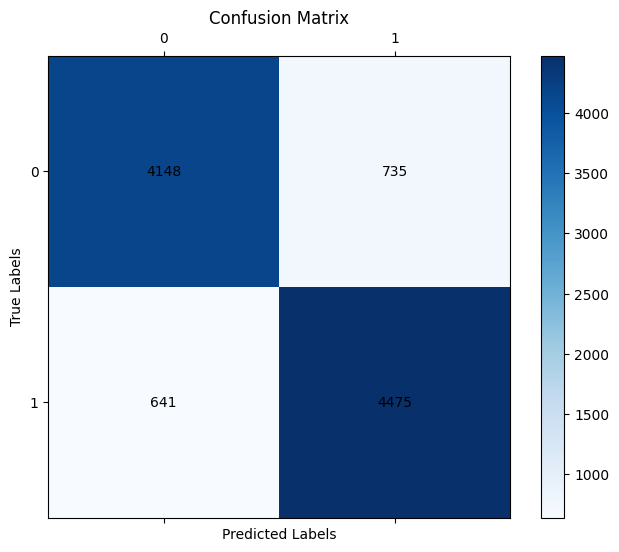

In [181]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')

fig.colorbar(cax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

ax.set_xticks(range(len(cm)))
ax.set_yticks(range(len(cm)))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()


In [182]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4883
           1       0.86      0.87      0.87      5116

    accuracy                           0.86      9999
   macro avg       0.86      0.86      0.86      9999
weighted avg       0.86      0.86      0.86      9999



In [187]:
accuracy_score(Y_test,Y_pred_labels)


0.8623862386238624

## BERT MODEL

In [192]:
!pip install torch -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [193]:
!pip install transformers

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

C:\Users\yugtg\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')